In [47]:
import pandas as pd
import urllib.request
import matplotlib

## Download latest covid cases file

In [5]:
url = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'
urllib.request.urlretrieve(url, "Covid19Casos.csv")

('Covid19Casos.csv', <http.client.HTTPMessage at 0x257fcb00fd0>)

## CSV to Dataframe

In [58]:
covidDF = pd.read_csv('Covid19Casos.csv')

## Useful transformantions

In [59]:
covidConfirmedDF = covidDF[covidDF['clasificacion_resumen'] == 'Confirmado']
covidDeathsDF = covidDF[covidDF['fallecido'] == 'SI']

## Infected by Province

,count
residencia_provincia_nombre,
Buenos Aires,252675
CABA,93515
Córdoba,8129
Jujuy,8089
Santa Fe,7430
Mendoza,6546
Río Negro,5870
Chaco,5342
Entre Ríos,3171


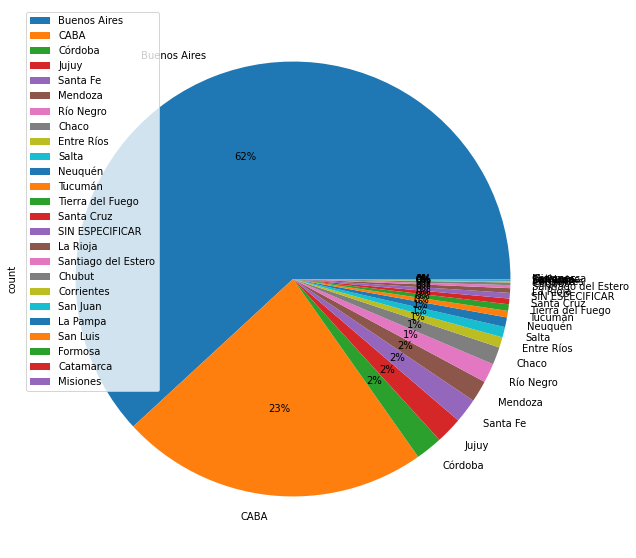

In [77]:
casesPerProvince = covidConfirmedDF.copy()
casesPerProvince['count'] = covidConfirmedDF.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
casesPerProvince = casesPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
casesPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', autopct='%1.0f%%', figsize=(10,10)).set_title("Infecteds by province")
casesPerProvince.set_index('residencia_provincia_nombre')

## Deaths by Province


,count
residencia_provincia_nombre,
Buenos Aires,7463
CABA,3035
Chaco,366
Jujuy,238
Mendoza,226
Río Negro,209
Entre Ríos,197
Córdoba,156
Santa Fe,124


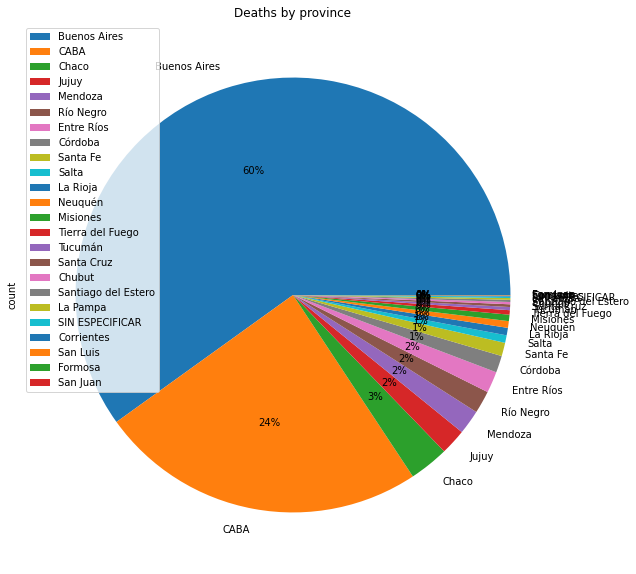

In [87]:
deathsPerProvince = covidDeathsDF.copy()
deathsPerProvince['count'] = deathsPerProvince.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
deathsPerProvince = deathsPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
deathsPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', autopct='%1.0f%%', figsize=(10,10)).set_title("Deaths by province")
deathsPerProvince.set_index('residencia_provincia_nombre')

## Deaths and infecteds by age

       count
edad        
30.0   96241
20.0   82949
40.0   76948
50.0   52569
60.0   28099
10.0   25893
0.0    15375
70.0   15175
80.0   10566
90.0    4168
100.0    137
120.0     38
110.0      5
       count
edad        
70.0    3156
80.0    3108
60.0    2363
90.0    1326
50.0    1239
40.0     639
30.0     283
20.0     158
0.0       77
100.0     47
10.0      45
120.0      1


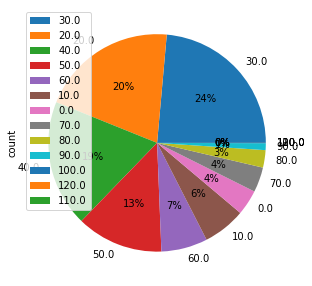

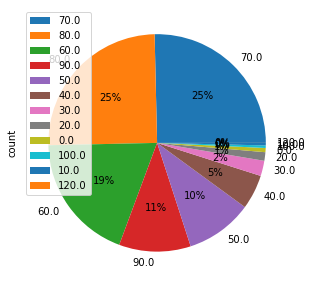

In [83]:
infectedsByAge = covidConfirmedDF.copy()
infectedsByAge['edad'] = infectedsByAge['edad'].apply(lambda x: x - (x % 10))
infectedsByAge['count'] = infectedsByAge.groupby('edad')['edad'].transform('count')
infectedsByAge = infectedsByAge[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
infectedsByAge.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Infecteds by age")
print(infectedsByAge.set_index('edad').head(20))

deathsByAge = covidDeathsDF.copy()
deathsByAge['edad'] = deathsByAge['edad'].apply(lambda x: x - (x % 10))
deathsByAge['count'] = deathsByAge.groupby('edad')['edad'].transform('count')
deathsByAge = deathsByAge[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
deathsByAge.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Deaths by age")
print(deathsByAge.set_index('edad').head(20))

## Deaths and infected by genre

Text(0.5, 1.0, 'Deaths by Genre')

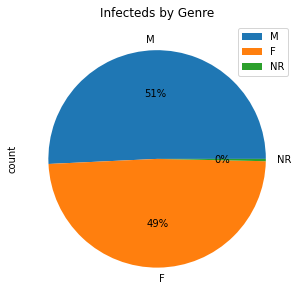

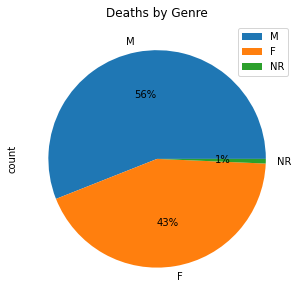

In [86]:
infectedsByGenre = covidConfirmedDF.copy()
infectedsByGenre['count'] = infectedsByGenre.groupby('sexo')['sexo'].transform('count')
infectedsByGenre = infectedsByGenre[['sexo', 'count']].groupby('sexo').count().reset_index().sort_values('count', ascending=False)
infectedsByGenre.set_index('sexo').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Infecteds by Genre")

deathsByGenre = covidDeathsDF.copy()
deathsByGenre['count'] = deathsByGenre.groupby('sexo')['sexo'].transform('count')
deathsByGenre = deathsByGenre[['sexo', 'count']].groupby('sexo').count().reset_index().sort_values('count', ascending=False)
deathsByGenre.set_index('sexo').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Deaths by Genre")